# 机器学习练习1-线性回归

使用python语言完成作业

代码修改并注释：Changersh，Changersh@outlook.com

## 简单测试

输出一个5x5的单位矩阵

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

In [102]:
A = np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 单变量线性回归

这个问题中，我们要根据ex1data1.txt中的人口和利润数据，预测我们的利润

In [103]:
data = pd.read_csv('ex1data1.txt', names=['Population', 'Profit']) # 导入数据
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [104]:
data.describe() # 数据的特征量

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


画个散点图

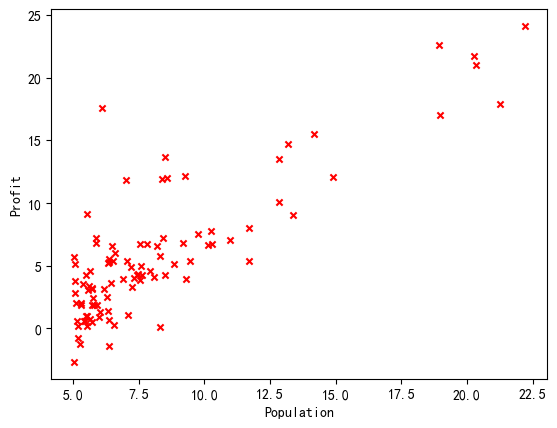

In [105]:
data.plot(kind='scatter', x = 'Population', y = 'Profit', marker='x', color = 'red')
plt.show()

我们使用梯度下降法来最小化代价函数 J
代价函数：
$$
J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}
$$
其中：
$$
{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}
$$

In [106]:
# 计算代价函数的方法
def computeCost(X, y, theta):
    # 直接矩阵相乘会自动使用广播机制，会扩展两个矩阵变成维数相同的，然后对应位置相乘。
    # 使用 np.dot() 是我们正常的矩阵相乘（点积）
    inner = np.power((np.dot(X, theta.T) - y), 2)
    return np.sum(inner) / (2 * X.shape[0]) # X.shape[0]求行数

构造矩阵，在训练集中添加一列，全为 1，便于之后的矩阵计算
可以直接先加到data矩阵中

In [107]:
data.insert(0, 'Ones', 1) # pandas处理DataFrame的方法，在0号列插入名字为 Ones 的全为 1 的列

In [108]:
data # 看一下插入后的效果

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


X是训练集、y是目标变量

In [109]:
len = data.shape[1] # 获得列数
X = data.iloc[:, :len-1] # 去掉最后一列

# 这个错误了，创建出来是一维的，不能使用，
# 下面这个只在 行切片了一次，返回的是 series
# y = data.iloc[:, len-1] # 最后一列

# 切片两次，返回 DataFrame
y = data.iloc[:, len-1:len] # 最后一列

看一下训练集X 和 目标变量y

In [110]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [111]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数应该是numpy矩阵，我们将X和y都转换才能使用

In [112]:
X = X.values
y = y.values

初始化一些变量

In [113]:
#theta = np.array([0, 0]) # 这样是 2x1的矩阵，实际应该是 1x2，然后在函数内转置
theta = np.array([[0, 0]]) # 一行两列
theta

array([[0, 0]])

直接运行然后出错了，数组形状不匹配，我们看看维度
是 theta 和 y 创建的维度错误了
因为是一列，创建的时候自动创建的是一维的，应该创建成二维的

其实问题主要是numpy自动广播，会把矩阵扩展成维数相同的，和我们一般的线代计算不一样了。
我们使用 np.dot(a, b) 实现的点积，和线代一样

In [114]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [115]:
computeCost(X, y, theta)

32.072733877455676

## 梯度下降算法更新 θ
$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1) \ (for \ j=0 \ and \ j=1)
$$
化简
$$
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m((h_\theta(x^{(i)}) - y^{(i)}))*x^{(i)}
$$
其中
$$
{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}
$$

In [116]:
def gradientDescent(X, y, theta, alpha, iteration): # iteration 迭代次数
    t = np.array(np.zeros(theta.shape)) # 用于存储更新后的theta
    len = theta.shape[1] # 获取 theta 的列
    cost = np.zeros(iteration) # 记录每次迭代的代价

    # 开始迭代更新 theta
    for i in range(iteration):
        error = np.dot(X, theta.T) - y # error 是预测值和真实值的差
        for j in range(len):
            tmp = np.sum(error * (X[:, j].reshape(X.shape[0], 1))) * alpha / X.shape[0]
            t[0, j] = theta[0, j] - tmp

        theta = t
        cost[i] = computeCost(X, y, theta)

    return theta, cost

初始化变量 alpha、iteration

In [117]:
alpha = 0.01
iteration = 1000

运行梯度下降算法

In [118]:
g, cost = gradientDescent(X, y, theta, alpha, iteration)
g

array([[-3.24140214,  1.1272942 ]])

用我们拟合出来的 g 来计算代价函数

In [119]:
computeCost(X, y, g)

4.515955503078914

绘制线性模型和数据，直观地看出拟合情况

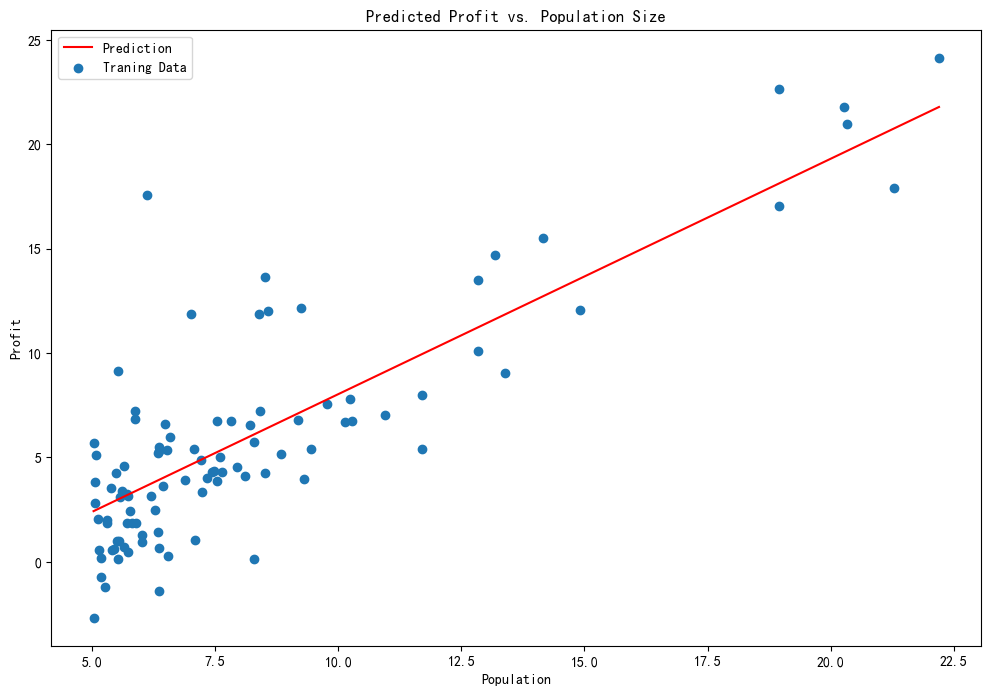

In [120]:
x = np.linspace(data.Population.min(), data.Population.max(), 100) # 生成等间距数字的数组，作为 f 的 x 值
f = g[0, 0] + (g[0, 1] * x) # 拟合出的线性函数

#  创建一个图形对象（fig）和一个坐标轴对象（ax）
# 返回的 fig 对象代表整个图形，而 ax 对象代表图形的坐标轴。
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction') # 绘制拟合的直线，x是输入，f是函数，label是图例
ax.scatter(data.Population, data.Profit, label='Traning Data') # 绘制散点图
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

绘制代价函数值的变化趋势，观察是否每一步值都是减小的

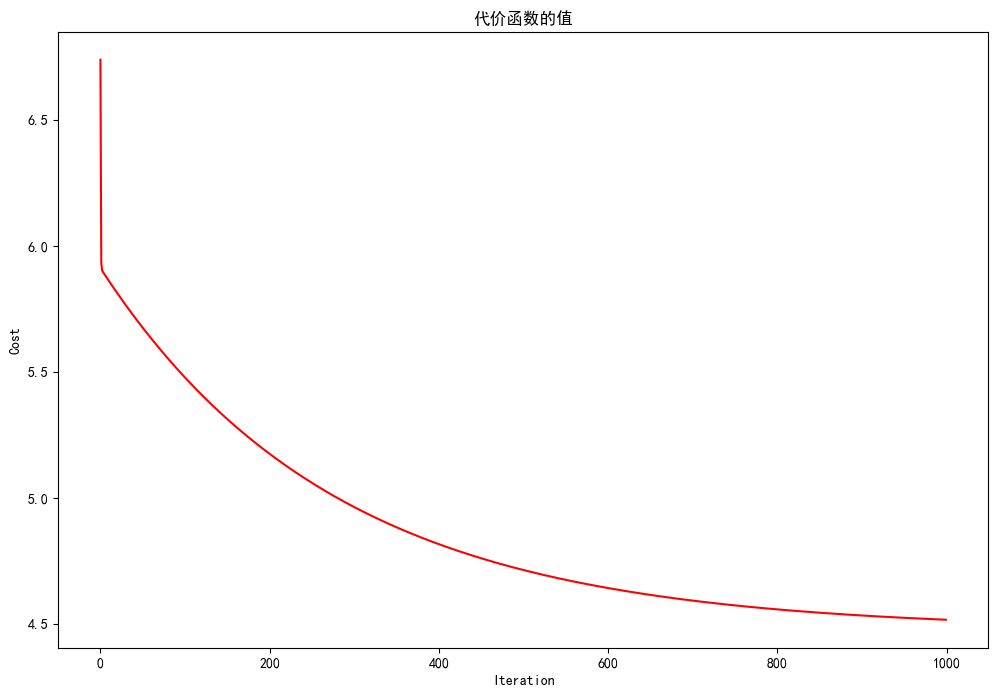

In [121]:
fix, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iteration), cost, 'r') # numpy.arange(start, stop, step, dtype=None) 创建一个具有等间隔数值的一维数组
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('代价函数的值')

plt.show()

## 多变量线性回归

这个案例是卖房子，数据集：房子大小、房间数量、售价

In [122]:
# 读入数据
path = 'ex1data2.txt'
data2 = pd.read_csv(path, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 特征归一化
每一项都减去均值然后除以标准差

In [123]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### 梯度下降
基本重复上一部分的操作

In [124]:
data2.insert(0, 'Ones', 1) # 添加一列，匹配 θ_0

In [125]:
len = data2.shape[1]
X2 = data2.iloc[:, :len-1]
y2 = data2.iloc[:, len-1:len]

# 转化成 numpy 数组
X2 = X2.values
y2 = y2.values

# 初始化变量
theta2 = np.array([[0, 0, 0]])

# 复用上面的 alpha、iteration
# 训练后的theta，代价
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iteration)
g2

array([[-1.10957343e-16,  8.78503652e-01, -4.69166570e-02]])

画出代价函数值的变化图

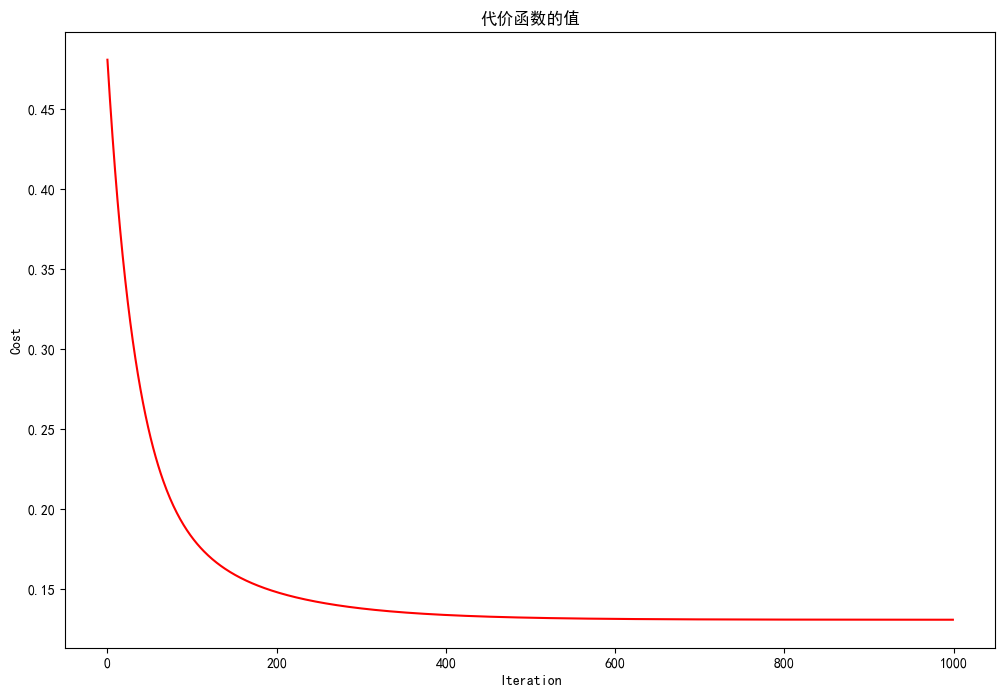

In [126]:
fix, ax = plt.subplots(figsize=(12, 8))

x2 = np.arange(iteration)
ax.plot(x2, cost2, 'r') # numpy.arange(start, stop, step, dtype=None) 创建一个具有等间隔数值的一维数组
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('代价函数的值')

plt.show()

## 正规方程
直接用公式一步解出来，不需要迭代，也不用特征归一化
仍然要在特征值前面加一列全为一的列来获得 θ_0

公式如下：
$$
\theta = (X^TX)^{-1}X^Ty
$$

In [127]:
# 用 @ 代替 dot 更方便
def normalEqu(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y # np.linalg.inv() 求逆矩阵
    return theta

In [128]:
normalEqu(X2, y2)

array([[-9.36750677e-17],
       [ 8.84765988e-01],
       [-5.31788197e-02]])